In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField
from pyts.datasets import load_gunpoint
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.utils import resample
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks, NearMiss
from sklearn.model_selection import train_test_split

In [24]:
df_hb_train = pd.read_csv('mitbih_train.csv', header=None)
df_hb_test = pd.read_csv('mitbih_test.csv', header=None)

In [25]:
df_hb_train[187].value_counts()

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64

In [26]:
df_hb_test[187].value_counts()

0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64

In [27]:
df_hb_train[df_hb_train[187] == 3]

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
80482,1.000000,0.899749,0.641604,0.314536,0.101504,0.107769,0.111529,0.071429,0.063910,0.058897,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
80483,0.732252,1.000000,0.983773,0.484787,0.178499,0.111562,0.081136,0.050710,0.046653,0.046653,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
80484,0.991984,1.000000,0.601202,0.280561,0.158317,0.146293,0.104208,0.090180,0.080160,0.070140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
80485,0.778378,0.528378,0.258108,0.128378,0.000000,0.037838,0.167568,0.235135,0.227027,0.222973,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
80486,1.000000,0.914931,0.531250,0.303819,0.178819,0.157986,0.128472,0.126736,0.118056,0.111111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81118,0.771529,1.000000,0.776801,0.316344,0.165202,0.124780,0.117750,0.108963,0.084359,0.091388,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
81119,0.590000,0.373333,0.283333,0.303333,0.340000,0.263333,0.136667,0.120000,0.090000,0.110000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
81120,1.000000,0.939286,0.553571,0.285714,0.166071,0.141071,0.112500,0.108929,0.094643,0.096429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
81121,1.000000,0.964981,0.778210,0.513619,0.214008,0.090791,0.112840,0.097276,0.075227,0.070039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [28]:
df_hb_train.shape

(87554, 188)

In [29]:
df_hb_test.shape

(21892, 188)

In [30]:
x_train = df_hb_train.iloc[:,:187]
x_test = df_hb_test.iloc[:,:187]

In [7]:
gasf = GramianAngularField(image_size=187, method='summation')
x_gasf_train = gasf.fit_transform(x_train)
x_gasf_test = gasf.transform(x_test)

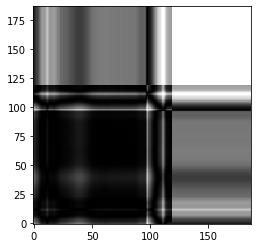

In [9]:
plt.imshow(x_gasf_train[87553], cmap='gray', origin='lower')

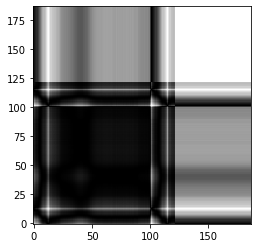

In [11]:
plt.imshow(x_gasf_test[21891], cmap='gray', origin='lower')

In [106]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset,TensorDataset

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from IPython import display
import os
from torch.utils.data.dataset import Dataset
from matplotlib.pyplot import imread
import glob
import os
import random
import pandas as pd
from sklearn.preprocessing import LabelEncoder

import torch.nn as nn
from torchvision.models import alexnet, vgg16, resnet152, resnet18, vgg19

%matplotlib inline

from torch.distributions.utils import lazy_property
import math
import h5py
from PIL import Image


import torch.nn.functional as nnf
from torch.utils.data import random_split
from torch.optim import SGD 
from torch.distributions import constraints
import torchvision as torchv
import torchvision.transforms as torchvt
import pickle

In [31]:
y_train = df_hb_train[187].values.astype(int)
y_test = df_hb_test[187].values.astype(int)

In [15]:
with h5py.File('hb_data_mit_bih.hdf5', mode='w') as hdf5_file:
    hdf5_file.create_dataset("x_train", (len(x_gasf_train), 224, 224), np.float32)
    hdf5_file.create_dataset("y_train", (len(y_train),), np.int32)
    hdf5_file.create_dataset("x_test", (len(x_gasf_test), 224, 224), np.float32)
    hdf5_file.create_dataset("y_test", (len(y_test),), np.int32)
    
    transform = transforms.Compose([transforms.Resize((224, 224))])
    
    for i, (x, y) in enumerate(zip(x_gasf_train, y_train)):
        image = Image.fromarray(x.astype(float))
        t = np.array(transform(image))
        hdf5_file["x_train"][i, ...] = t
        hdf5_file["y_train"][i] = y

    for i, (x, y) in enumerate(zip(x_gasf_test, y_test)):
        image = Image.fromarray(x.astype(float))
        t = np.array(transform(image))
        hdf5_file["x_test"][i, ...] = t
        hdf5_file["y_test"][i] = y

In [89]:
smt = SMOTE(sampling_strategy={1:20000, 2: 20000, 3: 20000, 4: 20000}, n_jobs=-1, random_state=42)
x_smt, y_smt = smt.fit_sample(x_train, y_train)
nms = NearMiss(sampling_strategy={0:20000}, n_jobs=-1)
x_train_bln, y_train_bln = nms.fit_resample(x_smt, y_smt)

In [95]:
smt_test = SMOTE(sampling_strategy={1: 819, 3: 819}, n_jobs=-1, random_state=42)
x_smt_test, y_smt_test = smt_test.fit_sample(x_test, y_test)
nms_test = NearMiss(sampling_strategy={0:819, 2:819, 4:819}, n_jobs=-1)
x_test_bln, y_test_bln = nms_test.fit_resample(x_smt_test, y_smt_test)

In [101]:
gasf = GramianAngularField(image_size=187, method='summation')
x_gasf_train_bln = gasf.fit_transform(x_train_bln)
x_gasf_test_bln = gasf.transform(x_test_bln)

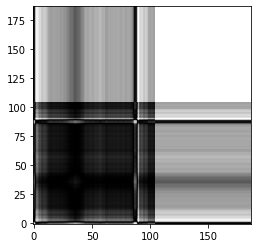

In [104]:
plt.imshow(x_gasf_test_bln[1000], cmap='gray', origin='lower')

In [107]:
with h5py.File('hb_data_mit_bih_balanced.hdf5', mode='w') as hdf5_file:
    hdf5_file.create_dataset("x_train", (len(x_gasf_train_bln), 224, 224), np.float32)
    hdf5_file.create_dataset("y_train", (len(y_train_bln),), np.int32)
    hdf5_file.create_dataset("x_test", (len(x_gasf_test_bln), 224, 224), np.float32)
    hdf5_file.create_dataset("y_test", (len(y_test_bln),), np.int32)
    
    transform = transforms.Compose([transforms.Resize((224, 224))])
    
    for i, (x, y) in enumerate(zip(x_gasf_train_bln, y_train_bln)):
        image = Image.fromarray(x.astype(float))
        t = np.array(transform(image))
        hdf5_file["x_train"][i, ...] = t
        hdf5_file["y_train"][i] = y

    for i, (x, y) in enumerate(zip(x_gasf_test_bln, y_test_bln)):
        image = Image.fromarray(x.astype(float))
        t = np.array(transform(image))
        hdf5_file["x_test"][i, ...] = t
        hdf5_file["y_test"][i] = y